### Rachel Tekchandani
### DATA 4319
---

### Supervised Learning : Support Vector Regression

![](SVR1.png)

Support vector regression is similar to linear regression but we have an $\epsilon$ insensitive tube around the regression line which allows for a specified amount of error in the model.

The distance between the points from the tube is minmized.  The equation is 

# $$ \frac{1}{2}\left\lVert w \right\rVert ^2 + C \sum_{i=1}^m ( \xi_1 + \xi^*_i ) \rightarrow min$$

In [10]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import Matrix

---

Data is a collection of salaries based on position and level. We can use this data to create a regression model to predict and justify a salary of someone coming into the company at a specific level.

![](salary.jpg)

---

In [7]:
#import the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
X = dataset.iloc[:, 1:-1].values
Matrix(X)

Matrix([
[ 1],
[ 2],
[ 3],
[ 4],
[ 5],
[ 6],
[ 7],
[ 8],
[ 9],
[10]])

In [12]:
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1) # reshape so that future functions have expected input
Matrix(y)

Matrix([
[  45000],
[  50000],
[  60000],
[  80000],
[ 110000],
[ 150000],
[ 200000],
[ 300000],
[ 500000],
[1000000]])

---

Feature scaling is needed using standardization.  We will not split the data and use all available points for training so that we have a model with high performance.

Since the values of the level is much lower than the salaries, we will need to scale the feature model.  Without feature scaling, the SVR model will not work as well. 

Both the level and salary will need to be scaled.

---

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)  # it will compute the mean and stard deviation to scale the features
y = sc_y.fit_transform(y)  # it will compute the mean and stard deviation to scale the targets

In [15]:
Matrix(X)

Matrix([
[ -1.56669890360128],
[ -1.21854359168988],
[-0.870388279778489],
[-0.522232967867094],
[-0.174077655955698],
[ 0.174077655955698],
[ 0.522232967867094],
[ 0.870388279778489],
[  1.21854359168988],
[  1.56669890360128]])

In [16]:
Matrix(y)

Matrix([
[-0.720042525177266],
[-0.702437573461441],
[ -0.66722767002979],
[-0.596807863166487],
[-0.491178152871534],
[-0.350338539144929],
[-0.174289021986673],
[ 0.177810012329838],
[ 0.882008080962862],
[  2.64250325254542]])

---

The features and targets have been scaled appropriately using the Sci Kit learn module.

We will now build the model using Sci-Kit Learn and use the Gaussian RBF Kernel

# $$ K ( \overrightarrow{x}, \overrightarrow{l^i} ) = e^{-\frac{\left\lVert \overrightarrow{x} - \overrightarrow{l^i} \right\rVert ^2}{2 \sigma^2}} $$

---

In [17]:
# import the class
from sklearn.svm import SVR
# create an instance of the SVR 
regressor = SVR(kernel = 'rbf')
# train the regressor using the entire dataset
regressor.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

---

Use the recently trained model to make a prediction using a level of 6.5 as the candidate has that level.

---

In [19]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))  # input the scaled version of 6.5

array([170370.0204065])

---

The predicted salary for the candidate at level 6.5 is $\$170,000$ after transforming the input value and then inverse transforming the output



We can inspect the model by performing a few visualizations.

----


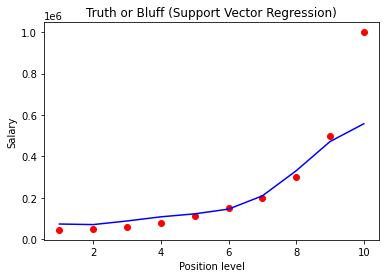

In [22]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

---

This notebook shows that support vector regression was able to fit well the data but failed to capture the one outlier from the CEO.  This is important to know if you were to use this model.  The choice of kernel was also important as the data was non-linear and so our Gaussian RBF kernel was able to fit the non-linear data.